In [94]:
file_name = "sketch_project3_goal3.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

# Importações

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from roboticstoolbox.mobile import DistanceTransformPlanner as dtp
from scipy.special import expit
import timeit
from utils import *

# Carregando Grade de Ocupação

In [96]:
log_occupation_grid = np.load('grid.npy')
occupation_grid = expit(log_occupation_grid)

In [97]:
occupation_grid.flatten

<function ndarray.flatten>

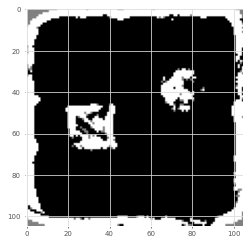

In [98]:
plt.imshow(occupation_grid, cmap='gray')

# Testando a Biblioteca _Robotics Toolbox_

In [99]:
map_planner = dtp(occgrid=occupation_grid, goal=(20,20),distance='manhattan')
map_planner.plan()
path = map_planner.query(start=(60, 20))
print(path)

[[60 20]
 [59 20]
 [58 20]
 [57 20]
 [56 20]
 [55 20]
 [54 20]
 [53 20]
 [52 20]
 [51 20]
 [50 20]
 [49 20]
 [48 20]
 [47 20]
 [46 20]
 [45 20]
 [44 20]
 [43 20]
 [42 20]
 [41 20]
 [40 20]
 [39 20]
 [38 20]
 [37 20]
 [36 20]
 [35 20]
 [34 20]
 [33 20]
 [32 20]
 [31 20]
 [30 20]
 [29 20]
 [28 20]
 [27 20]
 [26 20]
 [25 20]
 [24 20]
 [23 20]
 [22 20]
 [21 20]
 [20 20]]


# Funções Úteis

## Célula para Coordenada Espacial

In [100]:
def cell_to_coord(cell):
    if type(cell) == np.ndarray:
        coord_x = cell[:,0]/105*2*2.6-2.6
        coord_y = cell[:,1]/105*2*2.6-2.6
    else:
        coord_x = cell[0]/105*2*2.6-2.6
        coord_y = cell[1]/105*2*2.6-2.6
    return coord_x, coord_y

### Testando

In [101]:
celula = [52,52]
cell_to_coord(celula)

(-0.024761904761904763, -0.024761904761904763)

## Coordenada Espacial para Célula

In [102]:
def round_nearest(x, a):
    # https://stackoverflow.com/questions/28425705/python-round-a-float-to-nearest-0-05-or-to-multiple-of-another-float
    """Round to nearest multiple of a.

    Args:
        x (float): number to be rounded
        a (float): base number used for rounding

    Returns:
        float: rounded number
    """
    return round(round(x / a) * a, 2)

def get_cell(position, centersX, centersY):
    """Get cell from position.

    Args:
        position (numpy ndarray): robot's position in simulated cell
        centersX (numpy ndarray): centers of cells in X axis
        centersY (numpy ndarray): centers of cells in Y axis

    Returns:
        cell_x (int):the number of centersX's cell
        cell_y (int):the number of centersY's cell
    """
    # Tamanho da célula
    cell_size = 0.05
    # é necessário arredondar para 2 casas decimais
    centers_x = np.round(centersX,2)
    centers_y = np.round(centersY,2)

    position_x = round_nearest(position[0],cell_size)
    position_y = round_nearest(position[1],cell_size)
    cell_x = np.where(centers_x == position_x)[0][0]
    cell_y = np.where(centers_y == position_y)[0][0]

    return cell_x, cell_y

### Testando

In [103]:
lim_x = lim_y = [-2.6, 2.6]
cell_size = 0.05
centers_x = np.arange(lim_x[0], lim_x[1]+cell_size, cell_size)
centers_y = np.arange(lim_y[1], lim_y[0]-cell_size, -cell_size)
centers_x

array([-2.60000000e+00, -2.55000000e+00, -2.50000000e+00, -2.45000000e+00,
       -2.40000000e+00, -2.35000000e+00, -2.30000000e+00, -2.25000000e+00,
       -2.20000000e+00, -2.15000000e+00, -2.10000000e+00, -2.05000000e+00,
       -2.00000000e+00, -1.95000000e+00, -1.90000000e+00, -1.85000000e+00,
       -1.80000000e+00, -1.75000000e+00, -1.70000000e+00, -1.65000000e+00,
       -1.60000000e+00, -1.55000000e+00, -1.50000000e+00, -1.45000000e+00,
       -1.40000000e+00, -1.35000000e+00, -1.30000000e+00, -1.25000000e+00,
       -1.20000000e+00, -1.15000000e+00, -1.10000000e+00, -1.05000000e+00,
       -1.00000000e+00, -9.50000000e-01, -9.00000000e-01, -8.50000000e-01,
       -8.00000000e-01, -7.50000000e-01, -7.00000000e-01, -6.50000000e-01,
       -6.00000000e-01, -5.50000000e-01, -5.00000000e-01, -4.50000000e-01,
       -4.00000000e-01, -3.50000000e-01, -3.00000000e-01, -2.50000000e-01,
       -2.00000000e-01, -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,
       -9.32587341e-15,  

In [104]:
# metodologia
x = 2.45
y = 1.1
test_position = np.array([x+0.02, y+0.01]) # 2.47, 1.11
cell_x, cell_y = get_cell(test_position, centers_x, centers_y)
assert round(centers_x[cell_x],2) == x and round(centers_y[cell_y],2) == y

# Testando movimento do robô

## Conectando e Carregando o _Handler_

In [105]:
clientID = connect_2_sim()
test_connection(clientID)

Connected to remote API server
Number of objects in the scene:  42


In [106]:
# Recuperar handlers do dr20
errorCode, robo = sim.simxGetObjectHandle(clientID=clientID, objectName="./dr20",
                                          operationMode=sim.simx_opmode_blocking)

error_pos, pos_robo = sim.simxGetObjectPosition(clientID, robo, -1, sim.simx_opmode_blocking)

sim.simxGetObjectPosition(clientID, robo, -1, sim.simx_opmode_blocking)
left_motor_handle, right_motor_handle = get_dr20_motor_handles_(clientID)


motor handles successfully retrieved!


## Definição de Pontos Inicial e Final

In [107]:
initial_position = [1.5, -1.5]
goal_position = [-1.0, 1.0]
sim.simxSetObjectPosition(clientID, robo, -1, [1.5,-1.5,0.15104135870933533], sim.simx_opmode_blocking)

0

## Definição do Planejador de Caminhos e de seu Caminho

In [108]:
#map_planner = dtp(occgrid=occupation_grid, goal=get_cell(goal_position, centers_x, centers_y),distance='manhattan')
#map_planner.plan()
#path = map_planner.query(start=get_cell(initial_position, centers_x, centers_y))

map_planner = dtp(occgrid=occupation_grid, goal=get_cell(goal_position, centers_y, centers_x),distance='manhattan')
map_planner.plan()
path = map_planner.query(start=get_cell(initial_position, centers_y, centers_x))

In [109]:
path

array([[22, 22],
       [23, 23],
       [24, 24],
       [25, 25],
       [26, 26],
       [27, 27],
       [28, 28],
       [29, 29],
       [30, 30],
       [31, 31],
       [32, 32],
       [33, 33],
       [34, 34],
       [35, 35],
       [36, 36],
       [37, 37],
       [38, 38],
       [39, 39],
       [40, 40],
       [41, 41],
       [42, 42],
       [43, 43],
       [44, 44],
       [45, 45],
       [46, 46],
       [47, 47],
       [48, 48],
       [49, 49],
       [50, 50],
       [51, 51],
       [52, 52],
       [53, 53],
       [54, 54],
       [55, 55],
       [56, 56],
       [57, 57],
       [58, 58],
       [59, 59],
       [60, 60],
       [61, 61],
       [62, 62],
       [63, 63],
       [64, 64],
       [65, 65],
       [66, 66],
       [67, 67],
       [68, 68],
       [69, 69],
       [70, 70],
       [71, 71],
       [72, 72]])

# Gerando Posições a partir de Células

In [110]:
x, y = cell_to_coord(path)

In [111]:
path_points = np.stack((x,-y), axis=1)

In [112]:
lista_pontos = path_points.tolist()

In [113]:
send_points_to_sim(path_points, clientID)

Sending Points ...
Points sent: 51


# Fazer o robô seguir os pontos

In [25]:
def test_move_controlled():
    #Ganhos do controlador
    k_theta = 0.1
    k_l = 0.05

    #Dados do robô
    rd = 0.084601/2
    re = 0.084601/2
    B = 0.214


    for ponto in lista_pontos:
        xf = ponto[0]
        yf = ponto[1]

        p = np.array([[xf,yf]])
        send_points_to_sim(p, clientID=clientID)
        print(f'\nGoing to point {ponto}')
        start = timeit.default_timer()
        while True:
            error_pos, pos_robo = sim.simxGetObjectPosition(clientID, robo, -1, sim.simx_opmode_buffer)
            error_ang, ang_robo = sim.simxGetObjectOrientation(clientID, robo, -1, sim.simx_opmode_buffer)

            theta_robo = ang_robo[2] #+ np.pi/2

            #Calculo dos Delta x e y 
            delta_x = xf - pos_robo[0]
            delta_y = yf - pos_robo[1]

            #Calculo do theta estrela/Referencial
            theta_ref = np.arctan2(delta_y,delta_x)     


            #Calculo do delta l do referencial e  delta theta
            delta_l_ref = np.sqrt((delta_x)**2 + (delta_y)**2)     
            delta_theta = theta_ref - theta_robo

            if(delta_l_ref <= 0.1):
                break

            #Caluclo do delta L
            delta_l = delta_l_ref * np.cos(delta_theta)

            #Calculo da velocidade linear e angular
            v = k_l * delta_l
            w = k_theta * delta_theta

            #velocidades das juntas
            wd = (v/rd) + (B/(2*rd))*w
            we = (v/re) - (B/(2*re))*w

            #txt = [np.array(pos_robo).round(2), np.array(ang_robo).round(2), delta_l.round(2), we.round(2), wd.round(2)]
            robot_run(clientID, left_motor_handle, right_motor_handle, we, wd)
            #print(txt, ret)
                
        stop = timeit.default_timer()
        robot_run(clientID, left_motor_handle, right_motor_handle, 0, 0)
        print(f'Arrived at point {ponto} with pos {[px.round(4) for px in np.array(pos_robo)]}')
        print(f'Time: {round(stop - start, 3)}s\n')

In [28]:
# test_move_controlled()

Sending Points ...
Points sent: 1

Going to point [1.460952380952381, 1.460952380952381]


KeyboardInterrupt: 